In [1]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score
from matplotlib import pyplot

In [2]:
df = pd.read_csv('../datasets/tpt.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,1,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,1,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,1,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),0,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,1,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Nasser Mrs. Nicholas (Adele Achem),0,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,Sirayanian Mr. Orsen,1,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,Cacic Miss. Marija,0,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"""Petroff Mr. Pastcho (""""Pentcho"""")""",1,NaN,0,0,349215,7.8958,NaN,S


In [3]:
#features extraction
x = df[['Pclass', 'Sex']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  #splitting data with test size of 30%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print(classification_report(y_test,y_pred))

Accuracy=0.83
              precision    recall  f1-score   support

          No       0.84      0.89      0.87       167
         Yes       0.80      0.72      0.76       101

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

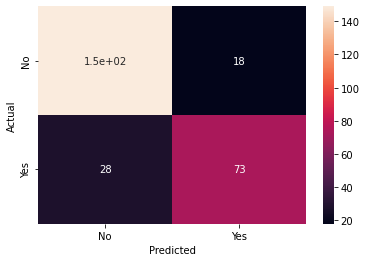

In [4]:
#confusion matrix
confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)


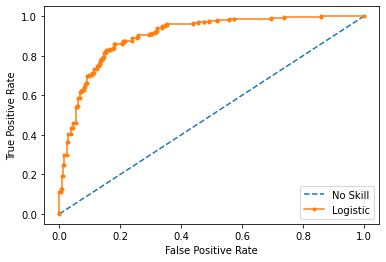

0.8283582089552238

In [5]:

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(trainX, trainy)
# predict probabilities
yhat = logreg.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
accuracy_score(y_test, y_pred)

In [6]:
"""
ROC is a graph that feature true positive rate on the Y axis and false positive rate on the X axis and allows us to summerize 
all the confusion matrices that each threshhold produces.
in our case ROC graph shows us that the proportion of data classified as true positive and true negative fromeach threshold 
is far more greater than the proportion of data classified as false positive/negative (except the 0 and 1 thresholds)
that means that our ML algorithm is predecting the majority of data correctly
the AUC gives us a numerical value that allows us to compare diffrent ROC curves and determine which one is the better (the
 higher the AUC value is the better it is)
"""

'\nROC is a graph that feature true positive rate on the Y axis and false positive rate on the X axis and allows us to summerize \nall the confusion matrices that each threshhold produces.\nin our case ROC graph shows us that the proportion of data classified as true positive and true negative fromeach threshold \nis far more greater than the proportion of data classified as false positive/negative (except the 0 and 1 thresholds)\nthat means that our ML algorithm is predecting the majority of data correctly\nthe AUC gives us a numerical value that allows us to compare diffrent ROC curves and determine which one is the better (the\n higher the AUC value is the better it is)\n'